In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
import sys
sys.path.append('../..')
import tcr_embedding.utils_training as utils
import config.constants_10x as const

from tcr_embedding.models.pertubation_prediction import predict_pertubation
from tcr_embedding.evaluation.PertubationPrediction import evaluate_pertubation

### Utility Functions

In [28]:
def load_model(adata, dataset, model, clone):
    path_model = f'saved_models/journal/{dataset.upper()}_clone_rev/{model}/scGen_{dataset}_{clone}_{model}.pt'
    model = utils.load_model(adata, path_model)
    return model

In [4]:
def load_modulation_data(dataset):
    adata = utils.load_data(dataset)
    return adata

### BCC dataset (Yost et al.)

In [29]:
dataset = 'bcc'
top_10_clonotypes = [
    5916, 
    5933, 
    7675, 
    5910, 
    2117, 
    5912,
    5977, 
    4746, 
    5909, 
    7660]

## UMAPS

... storing 'patient' as categorical
... storing 'treatment' as categorical
... storing 'sort' as categorical
... storing 'cluster' as categorical
... storing 'IR_VJ_1_locus' as categorical
... storing 'IR_VJ_2_locus' as categorical
... storing 'IR_VDJ_1_locus' as categorical
... storing 'IR_VDJ_2_locus' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_expr_raw' as categorical
... storing 'IR_VJ_2_expr_raw' as categorical
... storing 'IR_VDJ_1_expr_raw' as categorical
... storing 'IR_VDJ_2_expr_raw' as categorical
... storing 'IR_VJ_1_v_gene' as categorical
... storing 'IR_VJ_2_v_gene' as categorical
... storing 'IR_VDJ_1_v_gene' as categorical
... stor

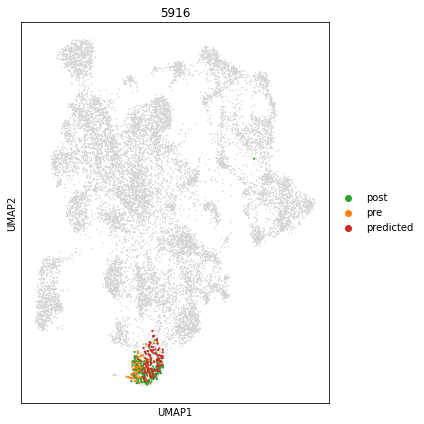

... storing 'patient' as categorical
... storing 'treatment' as categorical
... storing 'sort' as categorical
... storing 'cluster' as categorical
... storing 'IR_VJ_1_locus' as categorical
... storing 'IR_VJ_2_locus' as categorical
... storing 'IR_VDJ_1_locus' as categorical
... storing 'IR_VDJ_2_locus' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_expr_raw' as categorical
... storing 'IR_VJ_2_expr_raw' as categorical
... storing 'IR_VDJ_1_expr_raw' as categorical
... storing 'IR_VDJ_2_expr_raw' as categorical
... storing 'IR_VJ_1_v_gene' as categorical
... storing 'IR_VJ_2_v_gene' as categorical
... storing 'IR_VDJ_1_v_gene' as categorical
... stor

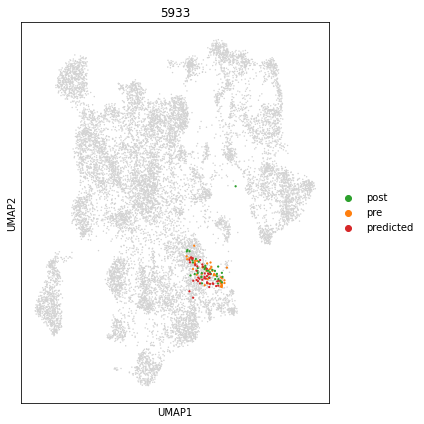

... storing 'patient' as categorical
... storing 'treatment' as categorical
... storing 'sort' as categorical
... storing 'cluster' as categorical
... storing 'IR_VJ_1_locus' as categorical
... storing 'IR_VJ_2_locus' as categorical
... storing 'IR_VDJ_1_locus' as categorical
... storing 'IR_VDJ_2_locus' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_expr_raw' as categorical
... storing 'IR_VJ_2_expr_raw' as categorical
... storing 'IR_VDJ_1_expr_raw' as categorical
... storing 'IR_VDJ_2_expr_raw' as categorical
... storing 'IR_VJ_1_v_gene' as categorical
... storing 'IR_VJ_2_v_gene' as categorical
... storing 'IR_VDJ_1_v_gene' as categorical
... stor

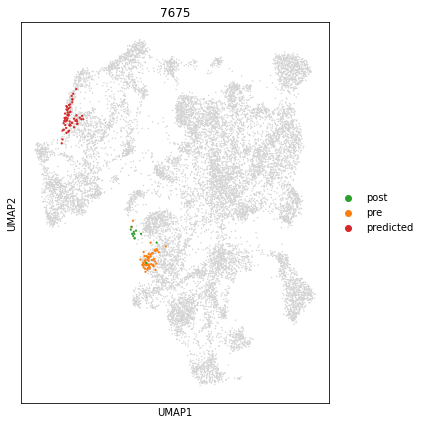

... storing 'patient' as categorical
... storing 'treatment' as categorical
... storing 'sort' as categorical
... storing 'cluster' as categorical
... storing 'IR_VJ_1_locus' as categorical
... storing 'IR_VJ_2_locus' as categorical
... storing 'IR_VDJ_1_locus' as categorical
... storing 'IR_VDJ_2_locus' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_expr_raw' as categorical
... storing 'IR_VJ_2_expr_raw' as categorical
... storing 'IR_VDJ_1_expr_raw' as categorical
... storing 'IR_VDJ_2_expr_raw' as categorical
... storing 'IR_VJ_1_v_gene' as categorical
... storing 'IR_VJ_2_v_gene' as categorical
... storing 'IR_VDJ_1_v_gene' as categorical
... stor

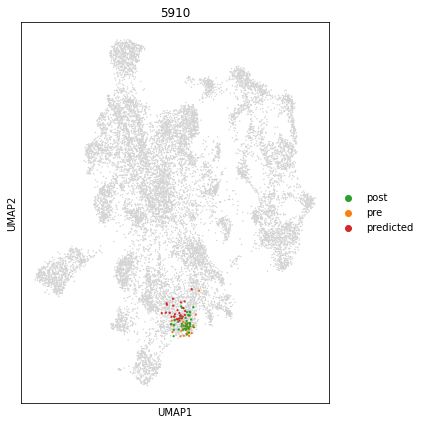

... storing 'patient' as categorical
... storing 'treatment' as categorical
... storing 'sort' as categorical
... storing 'cluster' as categorical
... storing 'IR_VJ_1_locus' as categorical
... storing 'IR_VJ_2_locus' as categorical
... storing 'IR_VDJ_1_locus' as categorical
... storing 'IR_VDJ_2_locus' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_expr_raw' as categorical
... storing 'IR_VJ_2_expr_raw' as categorical
... storing 'IR_VDJ_1_expr_raw' as categorical
... storing 'IR_VDJ_2_expr_raw' as categorical
... storing 'IR_VJ_1_v_gene' as categorical
... storing 'IR_VJ_2_v_gene' as categorical
... storing 'IR_VDJ_1_v_gene' as categorical
... stor

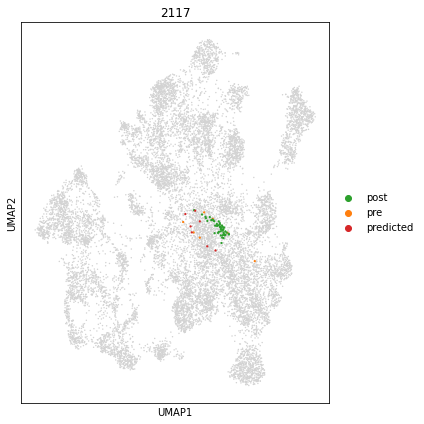

... storing 'patient' as categorical
... storing 'treatment' as categorical
... storing 'sort' as categorical
... storing 'cluster' as categorical
... storing 'IR_VJ_1_locus' as categorical
... storing 'IR_VJ_2_locus' as categorical
... storing 'IR_VDJ_1_locus' as categorical
... storing 'IR_VDJ_2_locus' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_expr_raw' as categorical
... storing 'IR_VJ_2_expr_raw' as categorical
... storing 'IR_VDJ_1_expr_raw' as categorical
... storing 'IR_VDJ_2_expr_raw' as categorical
... storing 'IR_VJ_1_v_gene' as categorical
... storing 'IR_VJ_2_v_gene' as categorical
... storing 'IR_VDJ_1_v_gene' as categorical
... stor

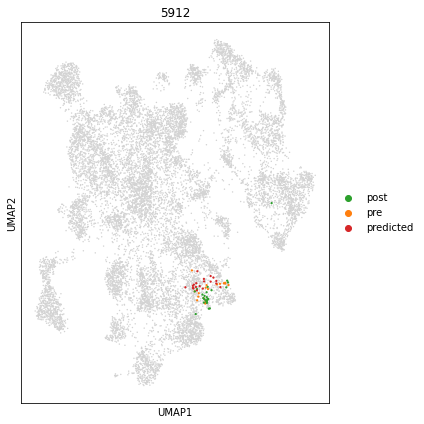

... storing 'patient' as categorical
... storing 'treatment' as categorical
... storing 'sort' as categorical
... storing 'cluster' as categorical
... storing 'IR_VJ_1_locus' as categorical
... storing 'IR_VJ_2_locus' as categorical
... storing 'IR_VDJ_1_locus' as categorical
... storing 'IR_VDJ_2_locus' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_expr_raw' as categorical
... storing 'IR_VJ_2_expr_raw' as categorical
... storing 'IR_VDJ_1_expr_raw' as categorical
... storing 'IR_VDJ_2_expr_raw' as categorical
... storing 'IR_VJ_1_v_gene' as categorical
... storing 'IR_VJ_2_v_gene' as categorical
... storing 'IR_VDJ_1_v_gene' as categorical
... stor

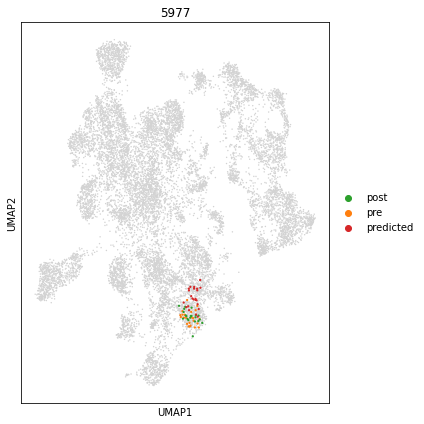

... storing 'patient' as categorical
... storing 'treatment' as categorical
... storing 'sort' as categorical
... storing 'cluster' as categorical
... storing 'IR_VJ_1_locus' as categorical
... storing 'IR_VJ_2_locus' as categorical
... storing 'IR_VDJ_1_locus' as categorical
... storing 'IR_VDJ_2_locus' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_expr_raw' as categorical
... storing 'IR_VJ_2_expr_raw' as categorical
... storing 'IR_VDJ_1_expr_raw' as categorical
... storing 'IR_VDJ_2_expr_raw' as categorical
... storing 'IR_VJ_1_v_gene' as categorical
... storing 'IR_VJ_2_v_gene' as categorical
... storing 'IR_VDJ_1_v_gene' as categorical
... stor

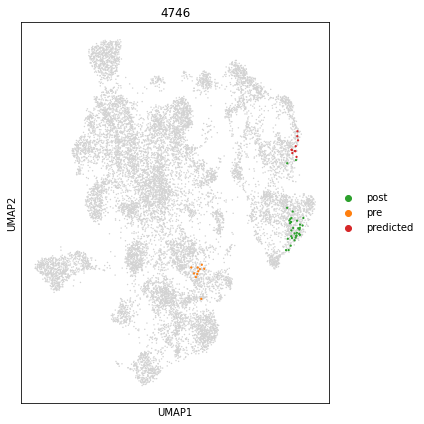

... storing 'patient' as categorical
... storing 'treatment' as categorical
... storing 'sort' as categorical
... storing 'cluster' as categorical
... storing 'IR_VJ_1_locus' as categorical
... storing 'IR_VJ_2_locus' as categorical
... storing 'IR_VDJ_1_locus' as categorical
... storing 'IR_VDJ_2_locus' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_expr_raw' as categorical
... storing 'IR_VJ_2_expr_raw' as categorical
... storing 'IR_VDJ_1_expr_raw' as categorical
... storing 'IR_VDJ_2_expr_raw' as categorical
... storing 'IR_VJ_1_v_gene' as categorical
... storing 'IR_VJ_2_v_gene' as categorical
... storing 'IR_VDJ_1_v_gene' as categorical
... stor

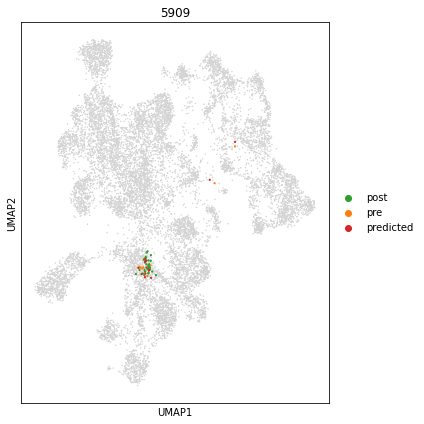

... storing 'patient' as categorical
... storing 'treatment' as categorical
... storing 'sort' as categorical
... storing 'cluster' as categorical
... storing 'IR_VJ_1_locus' as categorical
... storing 'IR_VJ_2_locus' as categorical
... storing 'IR_VDJ_1_locus' as categorical
... storing 'IR_VDJ_2_locus' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_expr_raw' as categorical
... storing 'IR_VJ_2_expr_raw' as categorical
... storing 'IR_VDJ_1_expr_raw' as categorical
... storing 'IR_VDJ_2_expr_raw' as categorical
... storing 'IR_VJ_1_v_gene' as categorical
... storing 'IR_VJ_2_v_gene' as categorical
... storing 'IR_VDJ_1_v_gene' as categorical
... stor

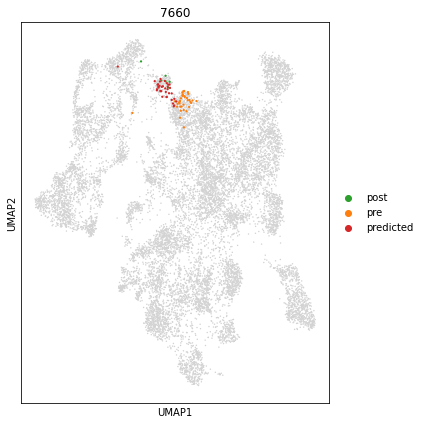

In [30]:
data = load_modulation_data(dataset)
sc.pp.neighbors(data)
sc.tl.umap(data)


for ct in top_10_clonotypes:
    data_tmp = data.copy()

    model = load_model(data_tmp, dataset, 'moe', ct)
    latent = model.get_latent(data_tmp, metadata=['patient', 'treatment', 'cluster', 'clonotype'])

    mask_val = latent.obs['clonotype']==ct

    latent_train = latent[~mask_val]
    latent_val = latent[mask_val]
    latent_val_pre = latent_val[latent_val.obs['treatment']=='pre']

    ad_pred = predict_pertubation(latent_train, latent_val_pre, model, 'treatment', 'pre', 
                                  var_names=data_tmp.var_names, col_type='clonotype')   
    ad_pred.obs['treatment'] = 'predicted'
    ad_pred.var_names = data.var_names
    
    #ad_recon = model.predict_rna_from_latent(latent, metadata=latent.obs.columns)
    #ad_recon.var_names = data.var_names
    ad_joint = data_tmp.concatenate(ad_pred)
      
    sc.pp.neighbors(ad_joint)
    sc.tl.umap(ad_joint)
    
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
    #sc.pl.umap(ad_joint, color='treatment', ax=ax[0][0], show=False)
    #sc.pl.umap(ad_joint, color='cluster', ax=ax[0][1], show=False)
    
    sc.pl.umap(ad_joint, ax=ax, show=False)
    sc.pl.umap(ad_joint[ad_joint.obs['clonotype']==ct], color='treatment', ax=ax, show=False, size=20, 
               title=str(ct), palette={'pre': 'tab:orange',
                                       'post': 'tab:green',
                                       'predicted': 'tab:red',
                                      })
    
    
    
    #sc.pl.umap(data, color='treatment', ax=ax[1][0], show=False)
    #sc.pl.umap(data, color='cluster', ax=ax[1][1], show=False)
    
    #sc.pl.umap(data, ax=ax[1][2], show=False)
    #sc.pl.umap(data[data.obs['clonotype']==ct], color='treatment', ax=ax[1][2], show=False, size=20)
    
    fig.tight_layout()
    plt.show()

## Metrics

In [31]:
data = load_modulation_data(dataset)

model_names = []
metrics = []
clono_types = []
scores = []


for ct in top_10_clonotypes:
    for model_name in ['rna', 'moe']:
        data_tmp = data.copy()
        model = load_model(data_tmp, dataset, model_name, ct)
        latent = model.get_latent(data_tmp, metadata=['patient', 'treatment', 'cluster', 'clonotype'])
        
        mask_val = latent.obs['clonotype']==ct
        
        latent_train = latent[~mask_val]
        latent_val = latent[mask_val]
        latent_val_pre = latent_val[latent_val.obs['treatment']=='pre']
        
        ad_pred = predict_pertubation(latent_train, latent_val_pre, model, 'treatment', 'pre', 
                                            var_names=data_tmp.var_names, col_type='clonotype')   
        
        ad_pred.obs['source'] = 'predicted'
        ad_pred.var_names = data.var_names

        data_ct = data_tmp[data_tmp.obs['clonotype']==ct]
        sc.tl.rank_genes_groups(data_ct, 'treatment', n_genes=50, method='wilcoxon')
        degs = data_ct.uns['rank_genes_groups']['names']
        degs = [gene for group in degs for gene in group]

        
        summary = evaluate_pertubation(data_ct, ad_pred, 'clonotype',
                                     'treatment', indicator='pre', gene_set=degs)
        
        model_names += [model_name] * 2
        clono_types += [ct] * 2
        metrics += ['R_squared', 'R_squared_top100'] 
        scores += [summary['all_genes']['r_squared'], summary['top_100_genes']['r_squared']]

  
    # Add Pre Cells as prediction to Eval
    data_ct = data_tmp[data_tmp.obs['clonotype']==ct]
   
    sc.tl.rank_genes_groups(data_ct, 'treatment', n_genes=50, method='wilcoxon')  
    degs = data_ct.uns['rank_genes_groups']['names']
    degs = [gene for group in degs for gene in group]
    
    ad_pred = data_tmp[(data_tmp.obs['clonotype']==ct) & (data_tmp.obs['treatment']=='pre')]
    summary = evaluate_pertubation(data_ct, ad_pred, 'clonotype',
                                     'treatment', indicator='pre', gene_set=degs)
    
    model_names += ['pre'] * 2
    clono_types += [ct] * 2
    metrics += ['R_squared', 'R_squared_top100'] 
    scores += [summary['all_genes']['r_squared'], summary['top_100_genes']['r_squared']]

        
    
results_bcc = {
    'model': model_names,
    'metric': metrics,
    'clonotype': clono_types,
    'score': scores,
}
results_bcc = pd.DataFrame(results_bcc)
results_bcc.to_csv('results/performance_bcc_clonotype.csv')
results_bcc

Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attrib

,model,metric,clonotype,score
0,rna,R_squared,5916,0.889363
1,rna,R_squared_top100,5916,0.687706
2,moe,R_squared,5916,0.963728
3,moe,R_squared_top100,5916,0.885629
4,pre,R_squared,5916,0.963035
5,pre,R_squared_top100,5916,0.750607
6,rna,R_squared,5933,0.939787
7,rna,R_squared_top100,5933,0.926209
8,moe,R_squared,5933,0.947343
9,moe,R_squared_top100,5933,0.945005


In [32]:
results_bcc.groupby(['model', 'metric'])['score'].mean()

model  metric          
moe    R_squared           0.888634
       R_squared_top100    0.809504
pre    R_squared           0.890484
       R_squared_top100    0.672093
rna    R_squared           0.883939
       R_squared_top100    0.818063
Name: score, dtype: float64

[Text(0, 0, 'rna'), Text(1, 0, 'moe'), Text(2, 0, 'pre')]

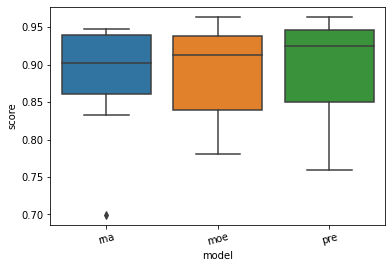

In [33]:
import seaborn as sb
plot = sb.boxplot(data=results_bcc[results_bcc['metric']=='R_squared'], y='score', x='model')
plot.set_xticklabels(plot.get_xticklabels(), rotation=15)

[Text(0, 0, 'rna'), Text(1, 0, 'moe'), Text(2, 0, 'pre')]

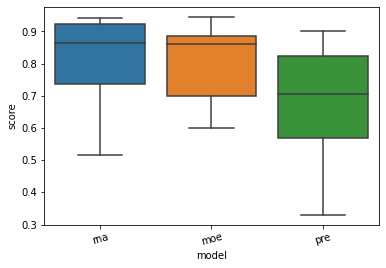

In [34]:
plot = sb.boxplot(data=results_bcc[results_bcc['metric']=='R_squared_top100'], y='score', x='model')
plot.set_xticklabels(plot.get_xticklabels(), rotation=15)

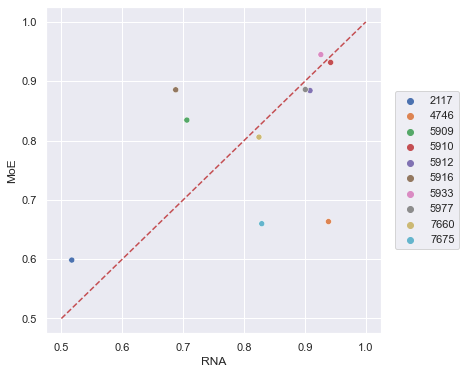

In [35]:
def do_regplot(df):
    sb.set(rc={'figure.figsize':(6, 6)})
    rna_values = df[df['model']=='rna']
    rna_values = rna_values.sort_values('clonotype')
    labels = [str(el) for el in rna_values['clonotype'].values]
    rna_values = rna_values['score'].values
    
    moe_values = df[df['model']=='moe']
    moe_values = moe_values.sort_values('clonotype')
    moe_values = moe_values['score'].values
    
    ax = sb.scatterplot(x=rna_values, y=moe_values, hue=labels)
    ax.plot([0.5, 1], [0.5, 1], 'r--')
    plt.legend(bbox_to_anchor=(1.25, 0.5), loc='right')
    ax.set_xlabel('RNA')
    ax.set_ylabel('MoE')
do_regplot(results_bcc[results_bcc['metric']=='R_squared_top100'])

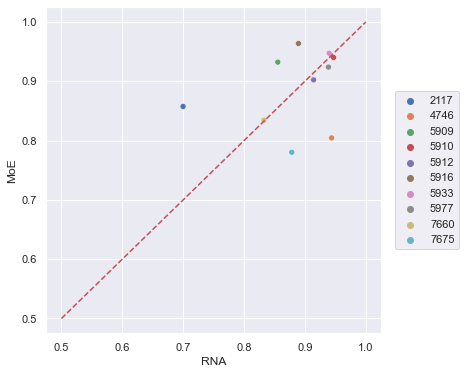

In [36]:
do_regplot(results_bcc[results_bcc['metric']=='R_squared'])